In [196]:
#To find out which factor triggers maximum Attrition as it a major factor in HR Analytics

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [198]:
df=pd.read_csv("IBM_HR_Attrition_Rate_Analytics")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [199]:
#Importing the library and the dataset to evaluate

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [201]:
#Attrition,BusinessTravel,Department, EducationField , Gender,JobRole,MaritalStatus,Over18,OverTime are object type of data rest are in int

In [202]:
df.shape

(1470, 35)

In [203]:
#there are 1470 rows and 35 columns

In [204]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [205]:
#no null values

<AxesSubplot:>

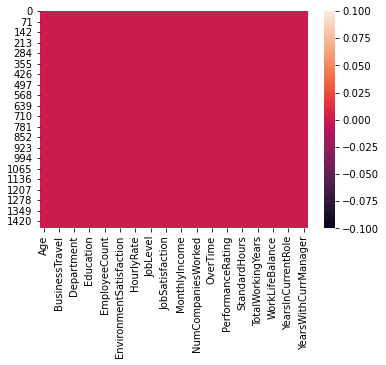

In [206]:
sns.heatmap(df.isnull())

In [207]:
#depecting no null values through heatmap

In [208]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('***********************************************')
        print('\n')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
***********************************************


BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
***********************************************


Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
***********************************************


EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
***********************************************


Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64

In [209]:
#finding the unique attributes of each dataset and its count

In [210]:
le=LabelEncoder()

In [211]:
df['Attrition']=le.fit_transform(df['Attrition'])

In [212]:
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])

In [213]:
df['Department']=le.fit_transform(df['Department'])

In [214]:
df['EducationField']=le.fit_transform(df['EducationField'])

In [215]:
df['Gender']=le.fit_transform(df['Gender'])

In [216]:
df['JobRole']=le.fit_transform(df['JobRole'])

In [217]:
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [218]:
df['Over18']=le.fit_transform(df['Over18'])

In [219]:
df['OverTime']=le.fit_transform(df['OverTime'])

In [220]:
#converting all object datset into numeric

In [221]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0


In [222]:
#checking the dataset after conversion

# Univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

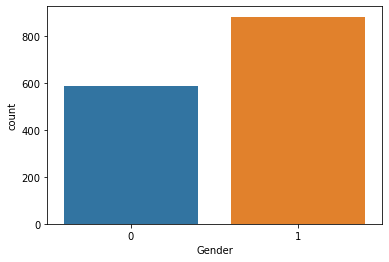

In [223]:
sns.countplot(df['Gender'])

In [224]:
#Gender:['Female' 'Male']
#Male      882 (1)
#Female    588 (0)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

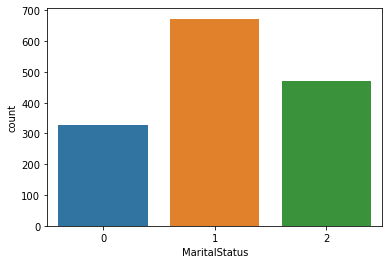

In [225]:
sns.countplot(df['MaritalStatus'])

In [226]:
#MaritalStatus:['Single' 'Married' 'Divorced']
#Married     673 (1)
#Single      470 (2)
#Divorced    327 (0)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

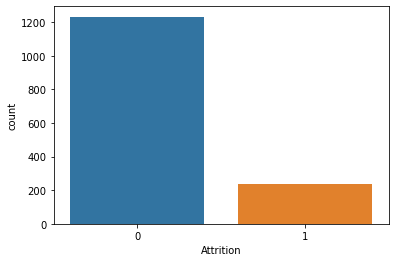

In [227]:
sns.countplot(df['Attrition'])

In [228]:
#Attrition:['Yes' 'No']
#No     1233 (0)
#Yes     237 (1)

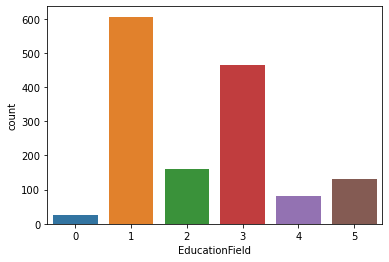

In [229]:
sns.countplot(df['EducationField'])
plt.show()

In [230]:
#EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
# 'Human Resources']
#Life Sciences       606 (1)
#Medical             464 (3)
#Marketing           159 (2)
#Technical Degree    132 (5)
#Other                82 (4)
#Human Resources      27 (0)

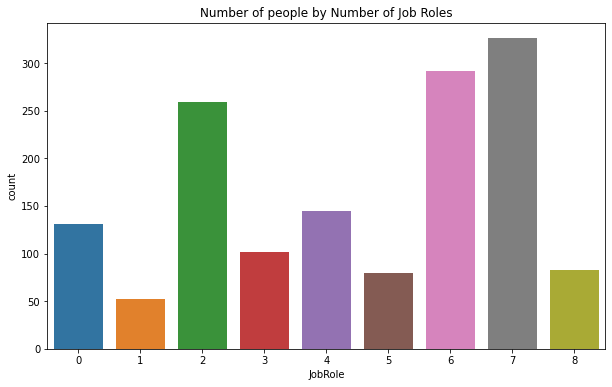

In [231]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole',data=df)
plt.title("Number of people by Number of Job Roles")
plt.show()

In [232]:
#JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
# 'Manufacturing Director' 'Healthcare Representative' 'Manager'
# 'Sales Representative' 'Research Director' 'Human Resources']
#Sales Executive              326 (7)
#Research Scientist           292 (6)
#Laboratory Technician        259 (2)
#Manufacturing Director       145 (4)
#Healthcare Representative    131 (0)
#Manager                      102 (3)
#Sales Representative          83 (8)
#Research Director             80 (5)
#Human Resources               52 (1)

# Bivariate Analysis

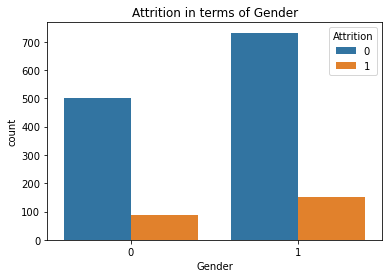

In [233]:
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title("Attrition in terms of Gender")
plt.show()

In [234]:
#Male has less attrition rate compared to female

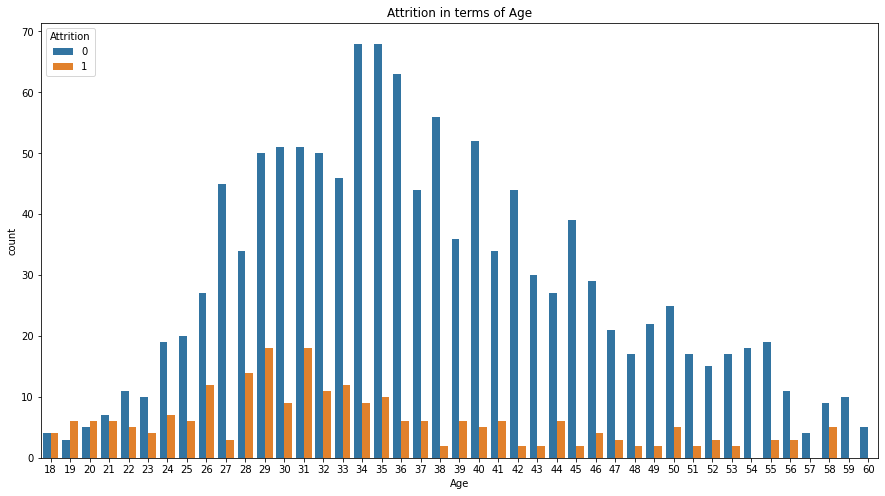

In [235]:
plt.figure(figsize=(15,8))
sns.countplot(x='Age',hue='Attrition',data=df)
plt.title("Attrition in terms of Age")
plt.show()

In [236]:
#Maximum attrition is early in the ages and with increase in age attrition rate reduces

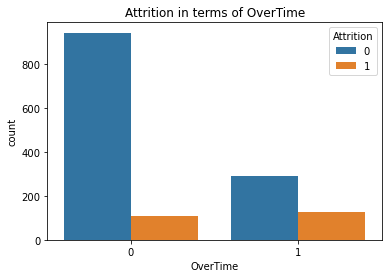

In [237]:
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.title("Attrition in terms of OverTime")
plt.show()

In [238]:
#OverTime:['Yes' 'No']
#No     1054 (0) - if no overtime, attrition rate(leaving=1) is less
#Yes     416 (1) - with overtime, attrition rate is more

In [239]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [240]:
#there is not much difference between mean and mode
#However theres is difference in range values

In [241]:
df_cor=df.corr()
df_cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [242]:
#EmployeeCount,Over18,StandardHours has NAN values as the values are same, does not vary so there is no correlation between them

In [243]:
col=['EmployeeCount','Over18','StandardHours']
d=df.drop(col,axis=1)
d.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [244]:
#checking the dataset after droping the above columns as it does not impact much to the attrition rate

In [245]:
#Finding the correlation of all the columns and graphically representing it in terms of attritation rate down below

In [246]:
d_cor=d.corr()
d_cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [247]:
#The dataset is more or less uniformly correlated

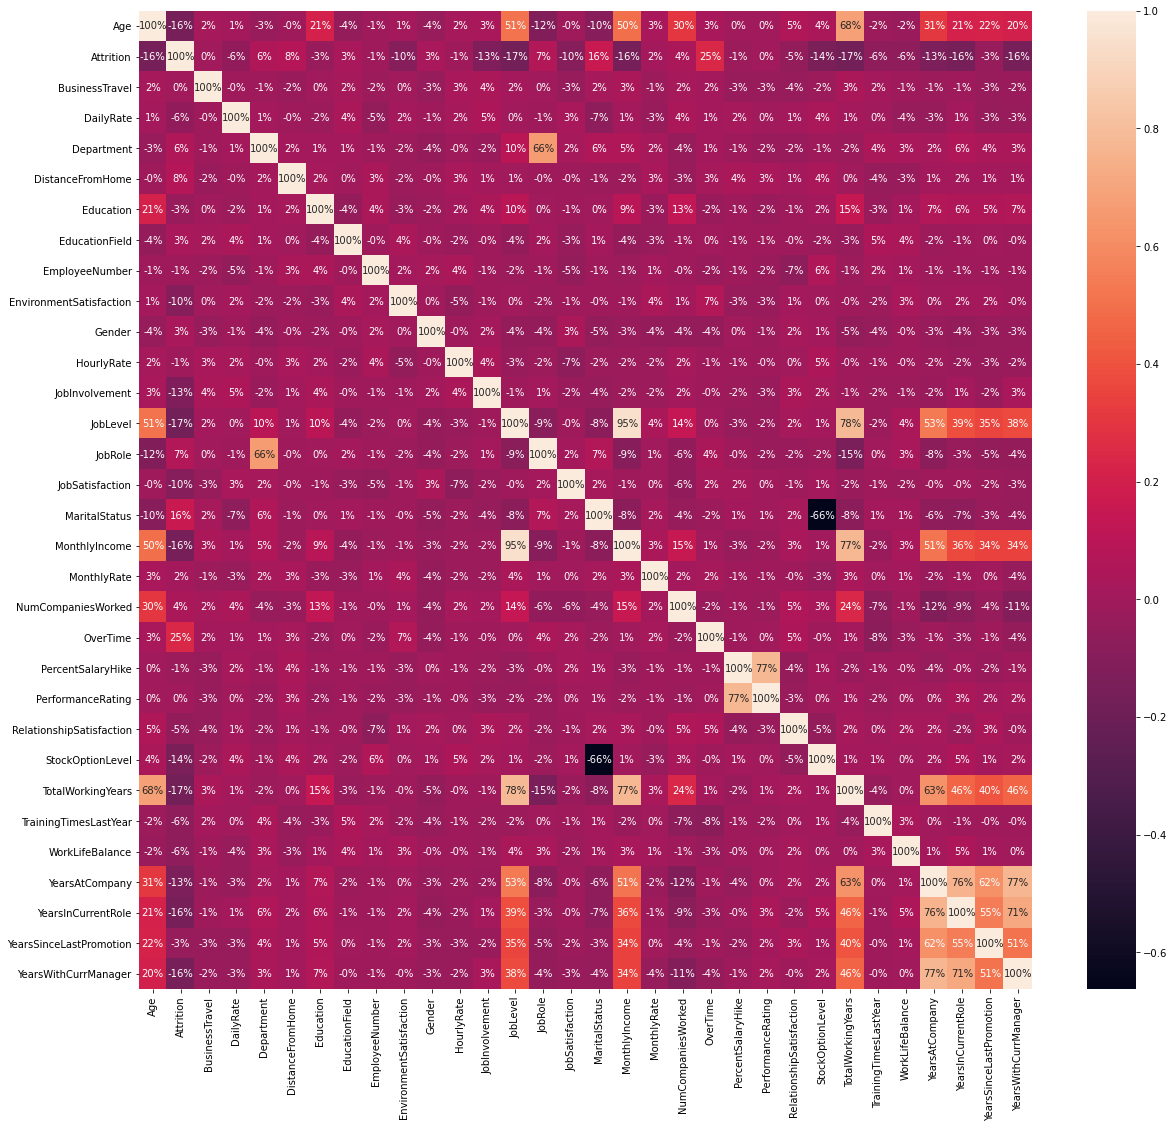

In [248]:
plt.figure(figsize=(20,18))
sns.heatmap(d_cor,annot=True,fmt='.0%')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

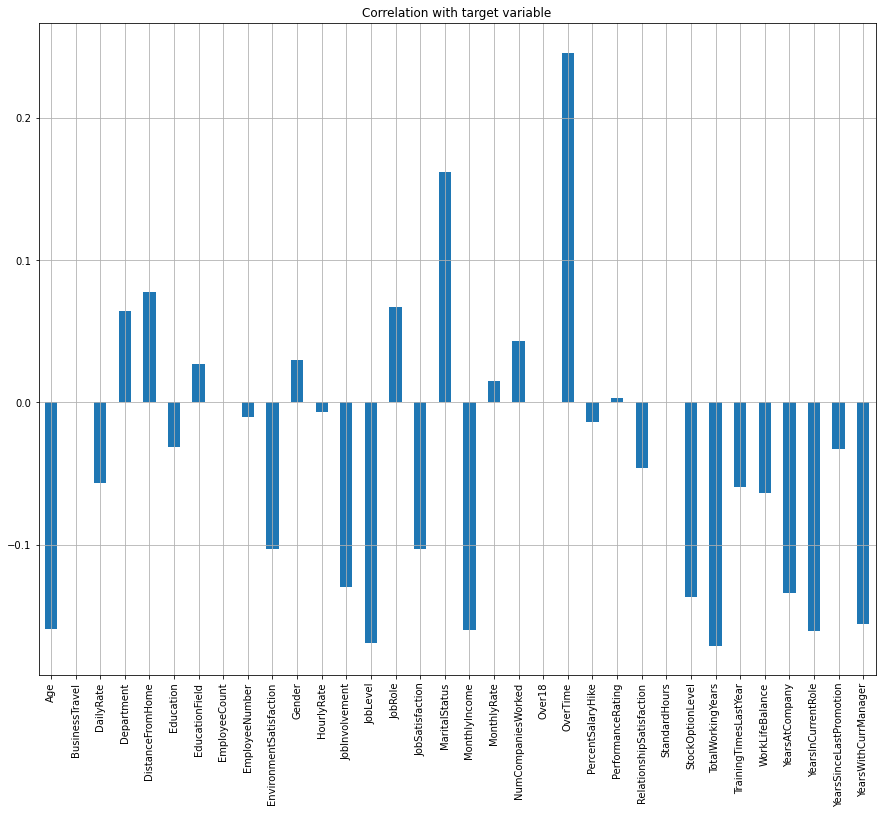

In [249]:
plt.figure(figsize=(15,12))
df.drop('Attrition',axis=1).corrwith(d['Attrition']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correlation with target variable")

In [250]:
# Attrition is directly linked to the following columns, if these attributes increases, attrition rate increases
#Department,DistanceFromHome,EducationField,Gender,Job Role,Marital Status,Montly rate,NumCompaniesWorked,Overtime,Performance Rating
#Among all - Overtime is the highest

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EmployeeCount               AxesSubplot(0.390714,0.642714;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.523571,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
HourlyRate                     AxesSubplot(0.125,0.513286;0.110714x0.107857)

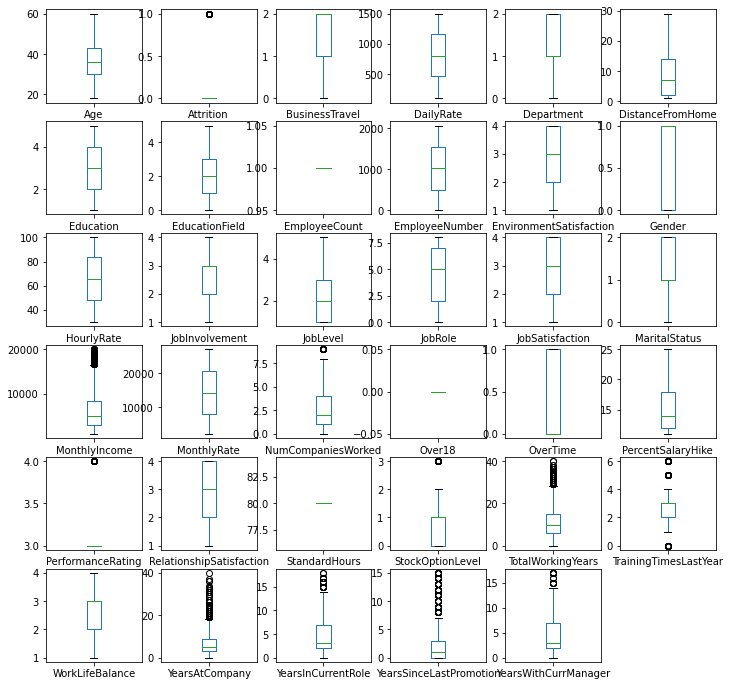

In [251]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(12,12))

In [252]:
#Attrition, Monthly Income,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
#YearsinCurrentRole,YearsSinceLastPromotion & YearsWithCurrManager has got outliers

In [253]:
from scipy.stats import zscore
z=np.abs(zscore(d))
z.shape

(1470, 32)

In [254]:
threshold=3
d_new=d[(z<3).all(axis=1)]
print(d.shape)
print(d_new.shape)

(1470, 32)
(1387, 32)


Percentage loss in Data

In [255]:
z=((1470-1387)/1470*100)
z

5.646258503401361

In [256]:
#Percentage loss in data
#Its close to normal

In [257]:
d_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [258]:
#0.5 being the standard skew value
# the columns-Attriton, Job level,MonthlyIncome,NumCompaniesWorked,PerformanceRating ,TotalWorkingYears,YearsAtCompany YearsSinceLastPromotion have skewed dataset
#splitting the dataset for training and testing

In [259]:
x=d_new.drop('Attrition',axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [260]:
y=d_new.iloc[:,1:2]
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [261]:
#Attrition is our target column

In [262]:
print(x.shape,'\t\t',y.shape)

(1387, 31) 		 (1387, 1)


In [263]:
#Checking the shape of input and target variable

In [264]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [265]:
#Removing the skewness through power_transform and scaling after wards using standard scaler

In [266]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [267]:
#scaling the dataset
# importing the logistic regression and various other models to to find the accuracy score ,best random state

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

In [269]:
lg=LogisticRegression()

In [270]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 91.36690647482014 found on random state 106


In [271]:
#accuracy score is quite good , found at the random state 106

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=106,stratify=y)

In [273]:
#spliting the train and test using the best random state 106

In [274]:
print(x_train.shape,'\t\t',x_test.shape)

(1109, 31) 		 (278, 31)


In [275]:
print(y_train.shape,'\t\t',y_test.shape)

(1109, 1) 		 (278, 1)


In [276]:
#checking the shape of train and test

# Finding the best parameters using GridSearchCV

In [277]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [278]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 23}


In [279]:
#Models with best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=23)
SVC=SVC()

In [280]:
model=[LR,GaussianNB(),DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('**************************************************')
    print('\n')

Accuracy score of  LogisticRegression(random_state=42) is:
0.8705035971223022
[[224   8]
 [ 28  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       232
           1       0.69      0.39      0.50        46

    accuracy                           0.87       278
   macro avg       0.79      0.68      0.71       278
weighted avg       0.86      0.87      0.86       278

**************************************************


Accuracy score of  GaussianNB() is:
0.7985611510791367
[[200  32]
 [ 24  22]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       232
           1       0.41      0.48      0.44        46

    accuracy                           0.80       278
   macro avg       0.65      0.67      0.66       278
weighted avg       0.81      0.80      0.80       278

**************************************************


Accuracy score of  DecisionTreeClassifier() is:
0.76618705035

In [281]:
#LogisticRegression has the best accuracy score

In [282]:
#Crossvalidate the models

In [283]:
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('**************************************************')
    print('\n')

Model: LogisticRegression(random_state=42)
Score: [0.91366906 0.86330935 0.84892086 0.87769784 0.84172662 0.8705036
 0.87769784 0.88405797 0.86956522 0.89855072]
Mean Score: 0.8745699092899594
Standard Deviation: 0.02029372309571514
**************************************************


Model: GaussianNB()
Score: [0.82733813 0.86330935 0.82733813 0.79136691 0.79856115 0.8057554
 0.78417266 0.79710145 0.83333333 0.83333333]
Mean Score: 0.8161609842560734
Standard Deviation: 0.023413458232426593
**************************************************


Model: SVC()
Score: [0.87769784 0.85611511 0.84892086 0.8705036  0.87769784 0.86330935
 0.84172662 0.87681159 0.83333333 0.86956522]
Mean Score: 0.8615681367949118
Standard Deviation: 0.015100014420065427
**************************************************


Model: DecisionTreeClassifier()
Score: [0.77697842 0.78417266 0.76258993 0.76258993 0.78417266 0.81294964
 0.73381295 0.79710145 0.79710145 0.7826087 ]
Mean Score: 0.7794077781253258
Standard 

In [284]:
#Above all LogisticRegression is giving the best score.

# Using Ensemble Technique to boostup the score

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [286]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('**************************************************')
    print('\n')

Accuracy score of  RandomForestClassifier() is:
0.8453237410071942
[[229   3]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       232
           1       0.67      0.13      0.22        46

    accuracy                           0.85       278
   macro avg       0.76      0.56      0.57       278
weighted avg       0.82      0.85      0.80       278

**************************************************


Accuracy score of  AdaBoostClassifier() is:
0.8489208633093526
[[223   9]
 [ 33  13]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       232
           1       0.59      0.28      0.38        46

    accuracy                           0.85       278
   macro avg       0.73      0.62      0.65       278
weighted avg       0.82      0.85      0.83       278

**************************************************


Accuracy score of  GradientBoostingClassifier() is:
0.8453237410

In [287]:
#RandomForestClassifier() gives the best value

In [288]:
#AUC_ROC Curve and finding auc score


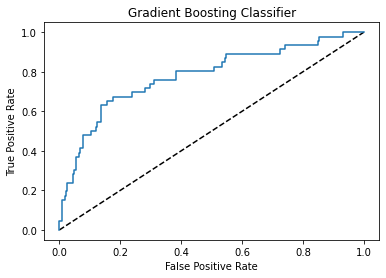

61.975262368815585


In [289]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=(roc_auc_score(y_test,predgbc)*100)
print(auc_score)

In [290]:
# the accuracy score of auc-roc curve is 61%

In [291]:
import pickle
filename='HR Attrition Rate.pkl'
pickle.dump(LR,open(filename,'wb'))

In [292]:
#Saving the model